In [1]:
import pandas as pd
import numpy as np
import json as j
import pickle as p
from scipy.stats import pearsonr, spearmanr, kendalltau
from scipy import stats
import sys

from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
# https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html

from IPython.display import display_html

In [2]:
shared_path = 'C:/Users/Jonas/git/thesis/code/shared'
if shared_path not in sys.path:
    sys.path.append(shared_path)
    
from Argument import Argument
from DataHandler import DataHandler

In [3]:
data = DataHandler()
data.load_bin('C:/Users/Jonas/git/thesis/not-gitted/argsme-crawled/1632239915.4824035-3756-arguments-cleaned-test.pickle')

In [4]:
data.validate()

True

In [5]:
BASE_PATH = 'results/GW 2021-10-05 Test'

In [6]:
arg_contexts = dict()
for a in data.get_arguments():
    arg_contexts[a.arg_id] = a.query

In [7]:
j.dump(arg_contexts, open(f'{BASE_PATH}/arg_contexts.json', 'w'))

In [8]:
context_level_results = pd.read_csv(f'{BASE_PATH}/exp00-contra-lexrank-test.csv')
#context_level_results = generic_context_results.append(context_level_results[1:], ignore_index=True)
context_level_results

,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,would_you_like_to_live_in_the_world_of_harry_potter_edge_corr,would_you_like_to_live_in_the_world_of_harry_potter_silhouette_coef,because_edge_corr,because_silhouette_coef,messi_edge_corr,...,milk_is_bad_edge_corr,milk_is_bad_silhouette_coef,religion_edge_corr,religion_silhouette_coef,india_covid_handling_edge_corr,india_covid_handling_silhouette_coef,climate_crisis_edge_corr,climate_crisis_silhouette_coef,taxes_edge_corr,taxes_silhouette_coef
0,NaN,NaN,NaN,0.099423,-0.050178,0.054616,-0.045787,0.290272,0.126364,-0.014030,...,0.076101,-0.053409,0.266524,-0.133621,0.239624,-0.053725,0.156707,-0.014625,0.024117,-0.074516
1,0.8,0.9,0.7,0.297291,0.052845,0.293301,0.034370,0.272316,0.096157,0.252635,...,0.382656,0.074008,0.277213,-0.058342,0.251017,-0.056202,0.387993,0.071775,0.370238,0.058753


In [9]:
arg_level_results = pd.read_csv(f'{BASE_PATH}/exp00-contra-lexrank-test-arg-level.csv')
arg_level_results

,d_1,d_2,d_3,arg_id,argumentativeness,weighted_degree_centrality,soc,arg_length
0,0.8,0.9,0.7,S3cfe9d25-Ae369c47f,0.681200,4.788085,0.843741,5.0
1,0.8,0.9,0.7,Sb6790209-A1d5b9a07,0.614393,5.802083,0.354127,19.0
2,0.8,0.9,0.7,Sab805e9c-Afe2ac875,0.668581,8.410657,0.793319,11.0
3,0.8,0.9,0.7,S3a0c8d79-A7a4b36a,0.616809,5.825377,0.722193,7.0
4,0.8,0.9,0.7,Sccd8513a-Afaaa3ae8,0.628221,10.980321,0.473962,27.0
...,...,...,...,...,...,...,...,...
3739,0.8,0.9,0.7,Sa442c039-Ac7e771e3,0.681023,8.526713,0.378670,22.0
3740,0.8,0.9,0.7,S954b168-A7899e671,0.687470,8.268616,0.785602,11.0
3741,0.8,0.9,0.7,S1ce229d0-Aee04835e,0.567318,6.486020,0.651151,10.0
3742,0.8,0.9,0.7,S331e50c4-A5321457a,0.654718,6.175269,0.739728,9.0


In [10]:
%%time
arg_level_results['param_combo'] = arg_level_results.apply(lambda row: (row.d_1, row.d_2,row.d_3), axis=1)
arg_level_results['context'] = arg_level_results.arg_id.apply(lambda arg_id: arg_contexts[arg_id])
arg_level_results['normalized_weighted_degree_centrality'] = arg_level_results.apply(lambda row: row.weighted_degree_centrality/row.arg_length, axis=1)
arg_level_results

Wall time: 256 ms


,d_1,d_2,d_3,arg_id,argumentativeness,weighted_degree_centrality,soc,arg_length,param_combo,context,normalized_weighted_degree_centrality
0,0.8,0.9,0.7,S3cfe9d25-Ae369c47f,0.681200,4.788085,0.843741,5.0,"(0.8, 0.9, 0.7)",only_the_moderately_well-off_pay_inheritance_t...,0.957617
1,0.8,0.9,0.7,Sb6790209-A1d5b9a07,0.614393,5.802083,0.354127,19.0,"(0.8, 0.9, 0.7)",k-pop,0.305373
2,0.8,0.9,0.7,Sab805e9c-Afe2ac875,0.668581,8.410657,0.793319,11.0,"(0.8, 0.9, 0.7)",violence,0.764605
3,0.8,0.9,0.7,S3a0c8d79-A7a4b36a,0.616809,5.825377,0.722193,7.0,"(0.8, 0.9, 0.7)",fracking,0.832197
4,0.8,0.9,0.7,Sccd8513a-Afaaa3ae8,0.628221,10.980321,0.473962,27.0,"(0.8, 0.9, 0.7)",decision_theory_important,0.406679
...,...,...,...,...,...,...,...,...,...,...,...
3739,0.8,0.9,0.7,Sa442c039-Ac7e771e3,0.681023,8.526713,0.378670,22.0,"(0.8, 0.9, 0.7)",covid_is_a_scam,0.387578
3740,0.8,0.9,0.7,S954b168-A7899e671,0.687470,8.268616,0.785602,11.0,"(0.8, 0.9, 0.7)",e-mobility,0.751692
3741,0.8,0.9,0.7,S1ce229d0-Aee04835e,0.567318,6.486020,0.651151,10.0,"(0.8, 0.9, 0.7)",football,0.648602
3742,0.8,0.9,0.7,S331e50c4-A5321457a,0.654718,6.175269,0.739728,9.0,"(0.8, 0.9, 0.7)",counter_strike,0.686141


In [11]:
arg_level_results_grouped_by_context_param_combo = arg_level_results[['context', 'param_combo', 'argumentativeness', 'normalized_weighted_degree_centrality', 'soc', 'd_1', 'd_2','d_3']].groupby(by=['context','param_combo']).mean()
arg_level_results_grouped_by_context_param_combo

,,argumentativeness,normalized_weighted_degree_centrality,soc,d_1,d_2,d_3
context,param_combo,,,,,,
abortion_legalization,"(0.8, 0.9, 0.7)",0.649721,1.233086,0.925984,0.8,0.9,0.7
abotion,"(0.8, 0.9, 0.7)",0.601714,0.715762,0.742074,0.8,0.9,0.7
administration,"(0.8, 0.9, 0.7)",0.626963,0.598852,0.667015,0.8,0.9,0.7
advantage_of_fair_skin,"(0.8, 0.9, 0.7)",0.625841,0.373301,0.472646,0.8,0.9,0.7
african,"(0.8, 0.9, 0.7)",0.661048,0.844507,0.799350,0.8,0.9,0.7
...,...,...,...,...,...,...,...
would_you_like_to_live_in_the_world_of_harry_potter,"(0.8, 0.9, 0.7)",0.586669,0.325140,0.417405,0.8,0.9,0.7
wuhan_virus,"(0.8, 0.9, 0.7)",0.679020,0.909175,0.824824,0.8,0.9,0.7
xbox,"(0.8, 0.9, 0.7)",0.641754,1.107969,0.878046,0.8,0.9,0.7


In [12]:
for context in set(arg_contexts.values()):
    if context in arg_level_results_grouped_by_context_param_combo.index.levels[0]:
        cont = arg_level_results_grouped_by_context_param_combo.loc[context]
        for index, row in cont.iterrows():
            target_idx = context_level_results[np.isclose(context_level_results.d_1, row.d_1) & np.isclose(context_level_results.d_2, row.d_2) & np.isclose(context_level_results.d_3, row.d_3)].index
            context_level_results.loc[target_idx, f'{context}_argumentativeness'] = row.argumentativeness
            context_level_results.loc[target_idx, f'{context}_degree_centrality'] = row.normalized_weighted_degree_centrality
            context_level_results.loc[target_idx, f'{context}_soc'] = row.soc  

In [13]:
context_level_results

,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,would_you_like_to_live_in_the_world_of_harry_potter_edge_corr,would_you_like_to_live_in_the_world_of_harry_potter_silhouette_coef,because_edge_corr,because_silhouette_coef,messi_edge_corr,...,is_islam_a_threat_to_the_world_soc,earth_is_flat_as_a_pizza_argumentativeness,earth_is_flat_as_a_pizza_degree_centrality,earth_is_flat_as_a_pizza_soc,colonizing_mars_argumentativeness,colonizing_mars_degree_centrality,colonizing_mars_soc,argument_argumentativeness,argument_degree_centrality,argument_soc
0,NaN,NaN,NaN,0.099423,-0.050178,0.054616,-0.045787,0.290272,0.126364,-0.014030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.8,0.9,0.7,0.297291,0.052845,0.293301,0.034370,0.272316,0.096157,0.252635,...,0.442537,0.598893,0.235276,0.335256,0.611835,0.310528,0.421981,0.617595,0.704921,0.642418


Next, we want to compute mean argumentativeness, degree centrality and soc over the different context per parameter value combination.

In [14]:
arg_level_results_grouped_by_param_combo = arg_level_results[['context', 'param_combo', 'argumentativeness', 'normalized_weighted_degree_centrality', 'soc', 'd_1', 'd_2','d_3']].groupby(by=['param_combo']).mean()
arg_level_results_grouped_by_param_combo.head()

,argumentativeness,normalized_weighted_degree_centrality,soc,d_1,d_2,d_3
param_combo,,,,,,
"(0.8, 0.9, 0.7)",0.624813,0.592285,0.581716,0.8,0.9,0.7


In [15]:
context_level_results['avg_argumentativeness'] = ''
context_level_results['avg_degree_centrality'] = ''
context_level_results['avg_soc'] = ''

for index, row in arg_level_results_grouped_by_param_combo.iterrows():
    #print(row)
    target_idx = context_level_results[np.isclose(context_level_results.d_1, row.d_1) & np.isclose(context_level_results.d_2, row.d_2) & np.isclose(context_level_results.d_3, row.d_3)].index
    #print(target_idx)
    context_level_results.loc[target_idx, 'avg_argumentativeness'] = row.argumentativeness
    context_level_results.loc[target_idx, 'avg_degree_centrality'] = row.normalized_weighted_degree_centrality
    context_level_results.loc[target_idx, 'avg_soc'] = row.soc
    
context_level_results.loc[0, 'avg_argumentativeness'] = 0.
context_level_results.loc[0, 'avg_degree_centrality'] = 0.
context_level_results.loc[0, 'avg_soc'] = 0.

In [16]:
context_level_results

,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,would_you_like_to_live_in_the_world_of_harry_potter_edge_corr,would_you_like_to_live_in_the_world_of_harry_potter_silhouette_coef,because_edge_corr,because_silhouette_coef,messi_edge_corr,...,earth_is_flat_as_a_pizza_soc,colonizing_mars_argumentativeness,colonizing_mars_degree_centrality,colonizing_mars_soc,argument_argumentativeness,argument_degree_centrality,argument_soc,avg_argumentativeness,avg_degree_centrality,avg_soc
0,NaN,NaN,NaN,0.099423,-0.050178,0.054616,-0.045787,0.290272,0.126364,-0.014030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,0.8,0.9,0.7,0.297291,0.052845,0.293301,0.034370,0.272316,0.096157,0.252635,...,0.335256,0.611835,0.310528,0.421981,0.617595,0.704921,0.642418,0.624813,0.592285,0.581716


In [18]:
context_level_results.to_csv('C:/Users/Jonas/git/thesis/code/evaluation/clr-context-level-results.csv',
                             index=False,
                             header=True)

In [17]:
avg_context_results = context_level_results[['d_1','d_2','d_3','avg_edge_corr','avg_silhouette_coef','avg_argumentativeness', 'avg_degree_centrality', 'avg_soc']]
#avg_context_results['normalized_avg_edge_corr'] = avg_context_results.avg_edge_corr.apply(lambda a: (a-avg_context_results.avg_edge_corr.min())/(avg_context_results.avg_edge_corr.max()-avg_context_results.avg_edge_corr.min()))
#avg_context_results['normalized_avg_silhouette_coef'] = avg_context_results.avg_silhouette_coef.apply(lambda a: (a-avg_context_results.avg_silhouette_coef.min())/(avg_context_results.avg_silhouette_coef.max()-avg_context_results.avg_silhouette_coef.min()))
avg_context_results

,d_1,d_2,d_3,avg_edge_corr,avg_silhouette_coef,avg_argumentativeness,avg_degree_centrality,avg_soc
0,NaN,NaN,NaN,0.099423,-0.050178,0,0,0
1,0.8,0.9,0.7,0.297291,0.052845,0.624813,0.592285,0.581716


# Argumentativeness ranking

In [7]:
with open('C:/Users/Jonas/git/thesis/code/evaluation/results/GW 2021-09-27/1632239915.4824035-3756-arguments-cleaned-test-sent-argQ.json', 'r') as file:
    argQ = j.load(file)

len(argQ)

3306

In [6]:
from sklearn.pipeline import Pipeline

from ArgumentativenessScorer import ArgumentativenessScorer
from CentralityScorer import CentralityScorer
from ContraLexRank import ContraLexRank
from ContrastivenessScorer import ContrastivenessScorer

In [8]:
%%time
arguments = data.get_filtered_arguments([DataHandler.get_args_filter_length(length=3), DataHandler.get_args_filter_context_size()])

Wall time: 7.18 s


In [9]:
len(arguments)

3744

In [10]:
pipeline = Pipeline(steps=[
        ('argumentativeness', ArgumentativenessScorer()),
        ('contrastiveness', ContrastivenessScorer()),
        ('centrality', CentralityScorer()),
        ('clr', ContraLexRank(0.8, 0.9, 0.7)),
    ])

In [11]:
%%time
arguments = pipeline.predict(arguments)

Wall time: 7min 21s


In [12]:
DataHandler(arguments).save_results(f'{BASE_PATH}/clr-test-predictions.json')

In [34]:
argQ_ranks = dict()
for argument in arguments:
    if len(argQ[argument.arg_id]) > 0:
        sentence_indices_arQ_ranked = list(reversed(np.argsort(argQ[argument.arg_id])))
        s0, s1 = argument.excerpt_indices
        argQ_ranks[argument.arg_id] = {
            'absolute': [sentence_indices_arQ_ranked.index(s0), sentence_indices_arQ_ranked.index(s1)],
            'relative': [sentence_indices_arQ_ranked.index(s0)/float(len(argument.sentences)), sentence_indices_arQ_ranked.index(s1)/float(len(argument.sentences))]
        }
    else:
        print(f'{argument.arg_id} has no quality labels')

S498c00-Abd76bc43 has no quality labels


In [36]:
hist_data = np.array([argQ_ranks[k]['relative'] for k in argQ_ranks.keys()])

In [37]:
xedges = [0, .1,.2,.3, .4,.5,.6,.7,.8,.9,1.]
yedges = [0, .1,.2,.3, .4,.5,.6,.7,.8,.9,1.]
H, xedges, yedges = np.histogram2d(hist_data[:,0], hist_data[:,1], bins=(xedges, yedges))

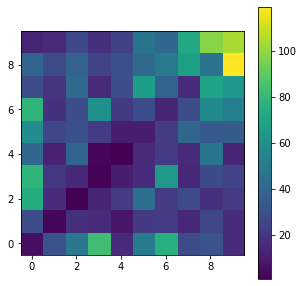

In [39]:
fig = plt.figure(figsize=(5,5))
#ax = fig.add_subplot(131, title='imshow: square bins')
#plt.imshow(H, interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])
plt.imshow(H, origin='lower')
plt.colorbar()

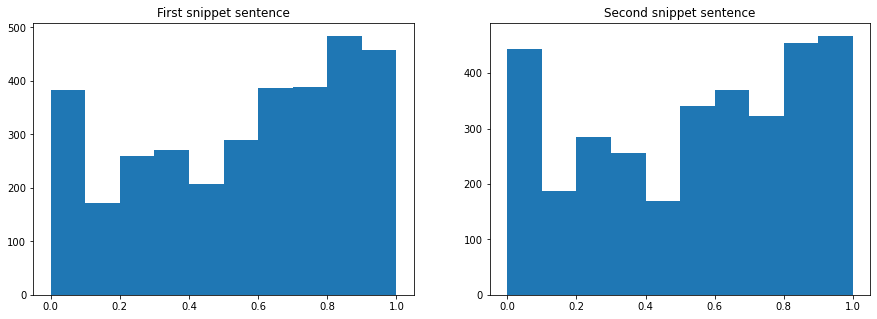

In [40]:
plt.figure(figsize=(15,5))
#plot 1:
plt.subplot(1, 2, 1)
plt.hist(hist_data[:,0], bins=xedges)
plt.title("First snippet sentence")

#plot 2:
plt.subplot(1, 2, 2)
plt.hist(hist_data[:,1], bins=yedges)
plt.title("Second snippet sentence")

plt.show()

How large is the proportion of argumentativeness the snippets contain compared to the complete argument? Is this a reasonable question?

In [46]:
snippets_arg_portion = dict()
for argument in arguments:
    if len(argQ[argument.arg_id]) > 0:
        s_arg = np.take(argQ[argument.arg_id], argument.excerpt_indices).sum()
        t_arg = sum(argQ[argument.arg_id])
        snippets_arg_portion[argument.arg_id] = s_arg/t_arg
    else:
        print(f'exception for {argument.arg_id}')

exception for S498c00-Abd76bc43


In [56]:
arg_proportions = [v for v in snippets_arg_portion.values() if isinstance(v, float)]

In [60]:
print('How much argumentativeness is contained in the snippet compared to the complete argument (percentage)?')
print(f'Mean\t{np.mean(arg_proportions)}')
print(f'Std\t{np.std(arg_proportions)}')
print(f'Median\t{np.median(arg_proportions)}')

How much argumentativeness is contained in the snippet compared to the complete argument (percentage)?
Mean	0.22975258162050907
Std	0.19732957377854546
Median	0.15926953646903974


In [11]:
data = DataHandler(arguments)
data.dump_data('results/1632239915.4824035-3756-arguments-cleaned-test-w-excerpts.pickle')

# Manual analysis

Go to Jupyter Notebook `Manual Analysis test set.ipynb`.

In [61]:
arg_contexts = {k: [] for k in DataHandler.get_query_context_keys(arguments)}

In [62]:
for k in arg_contexts.keys():
    arg_contexts[k] = DataHandler.get_query_context(arguments, k)

In [80]:
records = list()
for k in arg_contexts.keys():
    a = [len(b.sentences) for b in arg_contexts[k]]
    records.append({
        'context': k,
        'len': len(arg_contexts[k]),
        'arg_lengths': a,
        'mean_arg_length':  np.mean(a),
        'std_arg_length':  np.std(a),
        'median_arg_length': np.median(a),
        'max_arg_length': np.max(a),
    })
context_sizes = pd.DataFrame.from_records(records)

In [ ]:
context_sizes.sort_values(by=['len'], ascending=True)[:20]

In [89]:
context_sizes\
    [\
     (context_sizes.len <= 6) &\
     (context_sizes.max_arg_length <= 15)]\
    .sort_values(by=['len'], ascending=True)

,context,len,arg_lengths,mean_arg_length,std_arg_length,median_arg_length,max_arg_length
225,radio,3,"[5, 10, 15]",10.000000,4.082483,10.0,15
379,elon_musk,3,"[6, 3, 8]",5.666667,2.054805,6.0,8
305,pokemon,3,"[4, 9, 13]",8.666667,3.681787,9.0,13
304,religion,3,"[4, 4, 4]",4.000000,0.000000,4.0,4
445,merkel,3,"[6, 4, 4]",4.666667,0.942809,4.0,6
98,heart,3,"[10, 3, 4]",5.666667,3.091206,4.0,10
138,law,3,"[9, 7, 4]",6.666667,2.054805,7.0,9
167,arduino,3,"[6, 8, 3]",5.666667,2.054805,6.0,8
189,urbanization,3,"[3, 9, 8]",6.666667,2.624669,8.0,9
184,star_wars,3,"[3, 14, 10]",9.000000,4.546061,10.0,14


In [70]:
def print_arg(arg, hl=None):
    html_str = f'<p style="text-align:right">{arg.arg_id}</p><div style="border: solid black 1px; padding-left: 5px">'
    for idx, s in enumerate(arg.sentences):
        if hl is None:
            html_str += f'<span style="color:grey">{idx+1:02d} </span><span style="width:50%; background-color:{"yellow" if s in arg.snippet else "white"}">{s}</span><br>'
        else:
            html_str += f'<span style="color:grey">{idx+1:02d} </span><span style="width:50%; background-color:{"yellow" if idx in hl else "white"}">{s}</span><br>'
    display_html(html_str+ '</div>', raw=True)

In [104]:
for a in arg_contexts['is_golf_a_sport']:
    print_arg(a, a.excerpt_indices)

Sbb04abe6-A43a15a87 01 Kenicks, I thank you personally for the jab to keep me on my toes and the grammar error you so efficiently spotted out. 02 Look,this vendetta you have over golf and the sport is understandable, it does seem silly that while soldiers are risking life,teachers are over worked, and hard working single business owners are struggling to make it threw financially that people are getting paid millions to hit a white ball into a hole, and this can be said about any sport and that is perfectly understandable. 03 However your debate topic was not that golfers get over paid, or that golfers should not make as much money as baseball players, the point you started was that Golf is not a sport when in fact it is. 04 Again your vendetta against the sport is based purely on your opinion. 05 I have personal experience that golf is a game of extreme skill, and mental duress with some physical extortion. 06 The fact is Golf meets the criteria according to every definition of sport available. 07 Therefore in the minds of myself and the common English language golf is and should be considered a sport.

Sedab08a8-A58c94516 01 ok golf is a sport.. just like anyother sport you're in the sun so no argument there! 02 and people can cheer for you! have you not heard of pro golf tournaments? people go to watch them, and it is a big deal. 03 And it is a sport just like any other it takes time and dedication to master not just anybody can go whack a ball and go pro!

Sedab086a-A1b2b69e2 01 For my point, I look at the definition of sport: An activity involving physical exertion and skill in which an individual or team competes against another or others for entertainment. 02 You have yours but this one is also correct so I will use this one from Google Dictionary. 03 Exertion refers to vigorous activity which golfing is not. 04 Your definition calls golf a game, not a sport. 05 And based upon my definition of sport, (which is also correct) golf is not a sport. 06 This is stated by both you and I.

Sbb04abe6-A259c1dbe 01 Jlconservative, for future reference I have no harsh feelings towards your favoring of conserative government; just a light jab to keep you on your toes. 02 Before I tie up my argument i'd like to point out that when you stated, ...we might as well remove Hunting, Fishing, Krokae, Polo,Archery,Marksmanship, even surfing... you made quite a noticeable spelling error. 03 Please clarify with me in your response if you meant to reference the golf-like sport of Croquet, rather than your spelling of Krokae. 04 Yes, I do agree. 05 If, golf is not a sport, then most of these sports should be removed from the list as well, which I believe they should. 06 These sports, much like golf, require little physical strain, training, or duress. 07 Some of them even lack the concept of competition (fishing, hunting). 08 What burns me up the most about this sport is how the media overhypes it. 09 You can't turn on the TV without seeing an ad for the PGA Tour, the triumphs and tragedies of Tiger Woods, and the ridiculous amounts of money they earn by knocking a white ball into a hole. 10 I can tolerate (to a point) the sports you referenced being referred to as sports mainly because they are avoided by the media, for the purpose that some take these sports as low thrill, leading to little interest. 11 What sickens me the most is that the media has allowed golf to stand out among these hobbies. 12 And heaven forbid that the gentleman's sport of golf goes down in history, right in there with baseball, as a great American pastime. 13 Golf is not a sport.

In [106]:
possible_contexts_for_human_annotation_study = {
    'merkel', #3, 4.7
    'religion', #3, 4.
    'transnational_governance', # 3, 9.
    'aliens', # 10, 6.1
    'covid_vaccination_should_be_mandatory', # 6, 4.5
    'russia_is_bad', # 4, 6.75
    'trade_network', # 4, 5.5
    'forests', # 6, 5.3, maybe select only a few of the arguments
    'leaving_school_early', # 6, 5.2
    'urbanization', # 3, 6.7
    'star_wars', #3, 9.
    'is_golf_a_sport', # 4, 7.25
    
    #'radio', # 3, 10.
    #'law', #3, 6.7
}
len(possible_contexts_for_human_annotation_study)

12

__Observations__
* Even though sources/citations are important, they are likely to be snippets. 
    * [(Sb579644e-A6e00f137, 'transnational_governance'), ('S51d0a818-Aa4696306', 'radio'), ('Sce447b24-Aec66db96', 'veganism_is_healthy'), ('Seb991d36-A9c551936', 'educational_costs')]
* Some arguments suffer from definitions for their debates, and thus, they are not helpful in any way. 
* Arguments often show characteristics of its round-based origin (debates) where the opponent is addressed, but since the original context is not here, arguments are difficult to understand. General problem of argument search engine's data.
    * S63f15303-A2de94d75

__Arising questions__
* Are long sentence more likely to be snippet sentences (e.g. context transnational_governance)? Maybe only in short arguments, see nuclear_energy_should_be_banned.